<a href="https://colab.research.google.com/github/fnilvuwu/iris_machine_learning/blob/main/Tugas_MID_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Library

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import sklearn
import numpy as np
import sklearn.model_selection as ms

#Data Preparation

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Iris.csv')

In [6]:
#Menampilkan 5 data pertama
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#Menampilkan jumlah data, tipe data, dan data kosong masing masing kolom 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
#Gak penting sih ini, cuman ditampilin aja gapapa
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
#Drop kolom Id karna gak guna
df = df.drop(columns=['Id'])

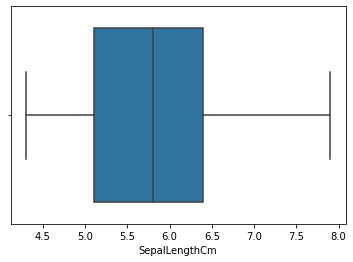

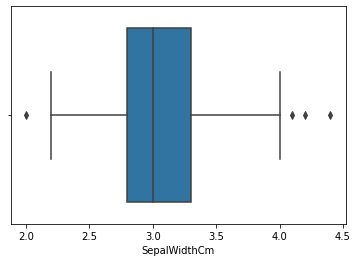

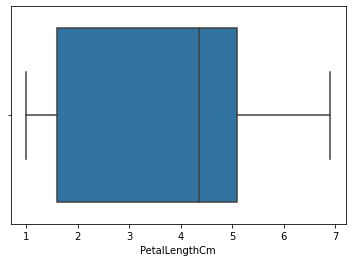

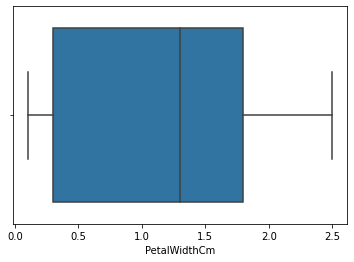

In [10]:
#Menampilkan boxplot, untuk mendeteksi outlier
plt.figure()

for col in list(['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']):
  sns.boxplot(x=df[col])
  plt.show()

In [11]:
#Menghapus Outlier pada kolom SepalWidthCm dengan metode IQR
Q1 = np.percentile(df['SepalWidthCm'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['SepalWidthCm'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

upper = np.where(df['SepalWidthCm'] >= (Q3+1.5*IQR))
lower = np.where(df['SepalWidthCm'] <= (Q1-1.5*IQR))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

In [12]:
#Melihat value unik di kolom species
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
#Mengubah tipe data object pada dataframe menjadi int dari 0 sampai n
le = LabelEncoder()
for col in df:
  if df['Species'].dtype == "object":
    df['Species'] = le.fit_transform(df['Species'])

In [14]:
#Melihat value unik di kolom species setelah di encode
df['Species'].unique()

array([0, 1, 2])

<b>Label Spesies  setelah encode</b> <br>
0 = Setosa <br>
1 = Versicolor <br>
2 = Virginica

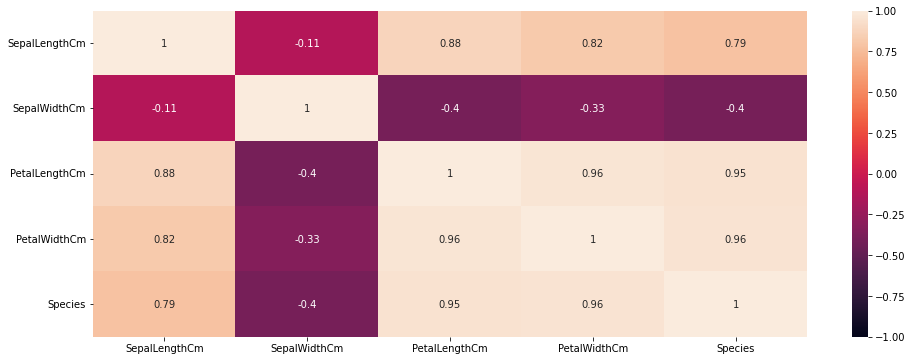

In [15]:
#Menampilkan Correlation antar data
plt.figure(figsize = (16, 6))
df_corr = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

In [16]:
df_clean = df
df_clean.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#Data Modeling

## Linear Regression

### Mengimport libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Membaca dataset

In [18]:
dataset = df
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


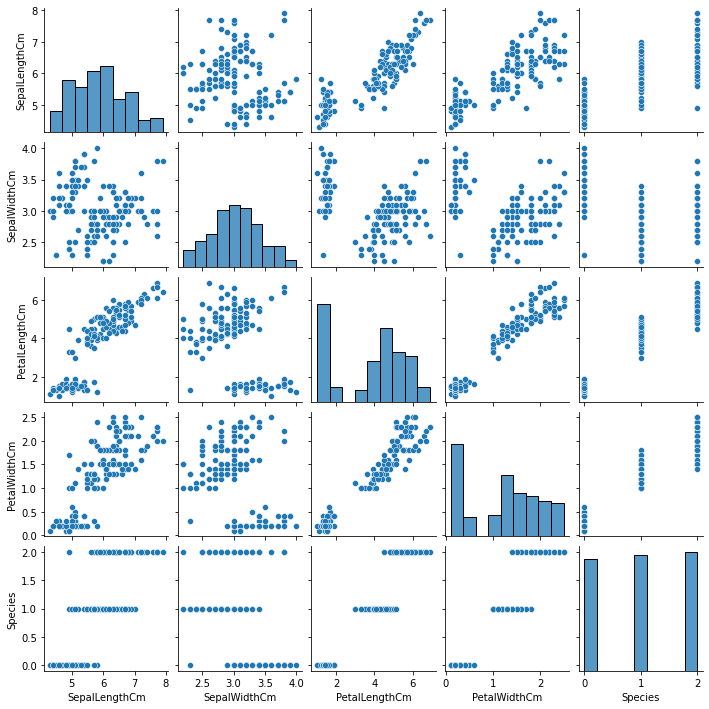

In [19]:
# Memvisualisasikan hubungan antar fitur menggunakan pair plot   
sns.pairplot(data = df, height = 2)  

Dapat dilihat bahwa jika semakin besar nilai 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', dan 'PetalWidthCm', maka bunga iris dapat diklasifikasikan ke dalam spesies '0 = Setosa', jika nilai berada di tengah-tengah, berarti spesies yang dimaksud adalah '1 = Versicolor, dan jika nilai semakin rendah maka bunga iris dalam dataset tersebut termasuk dalam spesies '2 = Virginica'. 




### Menetapkan nilai untuk variabel independen (X) dan variabel dependen (Y)

In [20]:
#Menetapkan nilai untuk X dan Y
x = dataset[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = dataset['Species']

### Memisahkan dataset menjadi train dan test set

In [21]:
#Memisahkan dataset
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

### Menerapkan model linier

In [22]:
#Fitting the Multiple Linear Regression model
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

### Persamaan Model

In [23]:
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))
# print("Intercept: ", clf.intercept_)
# print("Coefficients:")
# list(zip(x, clf.coef_))

Intercept:  0.08640492740026195
Coefficients:


[('SepalLengthCm', -0.09091588434932588),
 ('SepalWidthCm', -0.039422800133391445),
 ('PetalLengthCm', 0.2209675088643941),
 ('PetalWidthCm', 0.6087567735291048)]

### Prediksi pada set tes

In [24]:
y_pred_mlr= mlr.predict(x_test)

#Prediksi Nilai
print("Prediksi pada set tes: {}".format(y_pred_mlr))

Prediksi pada set tes: [ 0.84782816  0.00824668  0.13626825 -0.06716387  0.21264778  2.0161266
  1.31465354  1.72722485 -0.00872947  2.05629319 -0.10741509 -0.07113485
  0.88425193 -0.0275293   1.79197848  1.6544293   0.9180894   0.00309737
 -0.0362695   1.94965868  0.87910262  1.07097168 -0.02326434  1.80848842
  1.7362234   1.36649652  1.9099667   1.49872416  2.12858     1.17330561
  2.07803164  1.73248898  1.67655327  1.19028176  1.30674027  0.02613588
  0.09483871 -0.13101136 -0.08896665  0.05756078 -0.02288425  1.97084238
  1.99258774  2.01395059]


### Nilai aktual dan nilai prediksi

In [25]:
mlr_diff = pd.DataFrame({'Nilai Aktual': y_test, 'Nilai Prediksi': y_pred_mlr})
mlr_diff.head()

,Nilai Aktual,Nilai Prediksi
79,1,0.847828
29,0,0.008247
44,0,0.136268
49,0,-0.067164
43,0,0.212648


### Mengevaluasi Model

In [26]:
from sklearn import metrics

meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))

print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 92.86
Mean Absolute Error: 0.13312739534648274
Mean Square Error: 0.031565526486177976
Root Mean Square Error: 0.17766689755319637


### Visualisasi Kinerja Model

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


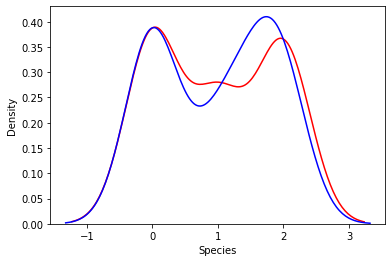

In [27]:
#Membandingkan nilai aktual dan prediksi untuk melihat seberapa baik kinerja model

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_mlr, hist=False, color="b", label="Fitted Values" , ax=ax1)

### Kesimpulan

Dapat dilihat bahwa Model Regresi Linier Berganda di atas bekerja dengan cukup baik karena 92,86% data sesuai dengan model regresi. Juga, kesalahan absolut rata-rata (Mean Absolute Error), kesalahan kuadrat rata-rata (Mean Squared Error), dan kesalahan kuadrat akar rata-rata lebih kecil (Root Mean Square Error).

## Desicion Tree

### Menerapkan model decision tree

In [28]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

### Prediksi pada set tes

In [29]:
y_pred_clf= clf.predict(x_test)

#Prediksi nilai untuk model classification tree
print("Prediksi pada set tes: {}".format(y_pred_clf))

Prediksi pada set tes: [1 0 0 0 0 2 1 2 0 2 0 0 1 0 2 2 1 0 0 2 1 1 0 2 2 1 2 2 2 1 2 2 2 1 1 0 0
 0 0 0 0 2 2 2]


### Nilai aktual dan nilai prediksi classification tree

In [30]:
clf_diff = pd.DataFrame({'Nilai Aktual': y_test, 'Nilai Prediksi': y_pred_clf})
clf_diff.head()

,Nilai Aktual,Nilai Prediksi
79,1,1
29,0,0
44,0,0
49,0,0
43,0,0


### Mengevaluasi Model

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_clf)*100))

conmat = confusion_matrix(y_test, y_pred_clf)
val = np.mat(conmat) 

classnames = list(set(y_train))

df_cm = pd.DataFrame(

        val, index=classnames, columns=classnames, 

    )

print(df_cm)

Accuracy: 97.73%
    0   1   2
0  17   0   0
1   0  10   1
2   0   0  16


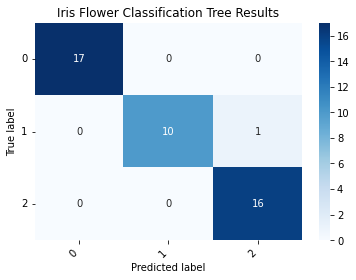

In [32]:
import matplotlib.pyplot as plt

import seaborn as sns

plt.figure()

heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True label')

plt.xlabel('Predicted label')

plt.title('Iris Flower Classification Tree Results')

plt.show()    

### Visualisasi Kinerja Model

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


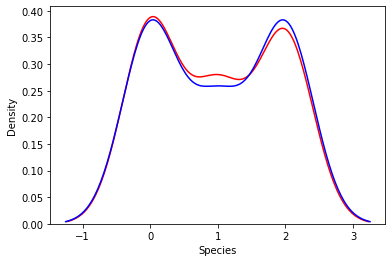

In [33]:
#Membandingkan nilai aktual dan prediksi untuk melihat seberapa baik kinerja model

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_clf, hist=False, color="b", label="Fitted Values" , ax=ax1)

### Kesimpulan

Model Decision Tree di atas bekerja dengan sangat baik karena 97.73% data sesuai dengan model decision tree. Juga, berdasarkan confusion matrix hanya ada 1 data yang salah